In [2]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the data
# Assuming the dataset file 'winequality_red.csv' is in the same directory as the Jupyter Notebook
df_wine = pd.read_csv('winequality-red.csv')

# Step 3: Separate features (X) and target variable (y)
X_wine = df_wine.drop('quality', axis=1)  # Features (all columns except 'quality')
y_wine = df_wine['quality']  # Target variable ('quality')

# Step 4: Split the data into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

# Step 5: Feature Scaling (optional but recommended for some algorithms)
scaler_wine = StandardScaler()
X_train_scaled_wine = scaler_wine.fit_transform(X_train_wine)
X_test_scaled_wine = scaler_wine.transform(X_test_wine)

# Step 6: Model Selection and Training
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled_wine, y_train_wine)

# Step 7: Model Evaluation
y_pred_wine = linear_regression.predict(X_test_scaled_wine)

# Step 8: Calculate evaluation metrics
mse_wine = mean_squared_error(y_test_wine, y_pred_wine)
r2_wine = r2_score(y_test_wine, y_pred_wine)

# Step 9: Print the results
print(f'Linear Regression Mean Squared Error (MSE) for Wine Quality Prediction: {mse_wine:.2f}')
print(f'Linear Regression R-squared (R2) for Wine Quality Prediction: {r2_wine:.2f}')


Linear Regression Mean Squared Error (MSE) for Wine Quality Prediction: 0.39
Linear Regression R-squared (R2) for Wine Quality Prediction: 0.40


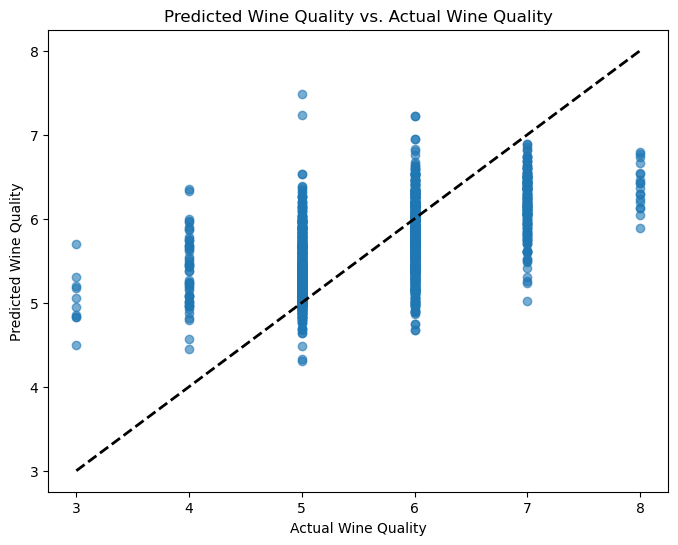

In [3]:
import numpy as np
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Step 10: Cross-validation to get predicted wine quality
predicted_wine_quality = cross_val_predict(linear_regression, X_wine, y_wine, cv=5)

# Step 11: Visualize predicted wine quality vs. actual wine quality
plt.figure(figsize=(8, 6))
plt.scatter(y_wine, predicted_wine_quality, alpha=0.6)
plt.plot([y_wine.min(), y_wine.max()], [y_wine.min(), y_wine.max()], 'k--', lw=2)
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('Predicted Wine Quality vs. Actual Wine Quality')
plt.show()


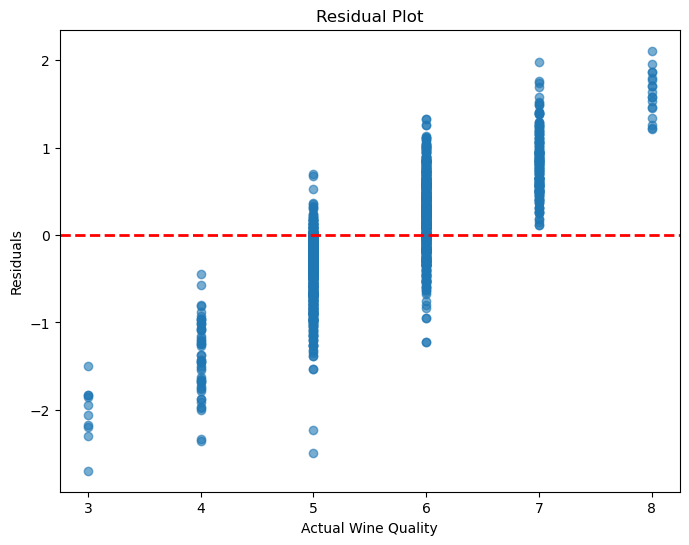

In [4]:
# Calculate the residuals
residuals = y_wine - predicted_wine_quality

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_wine, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Actual Wine Quality')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


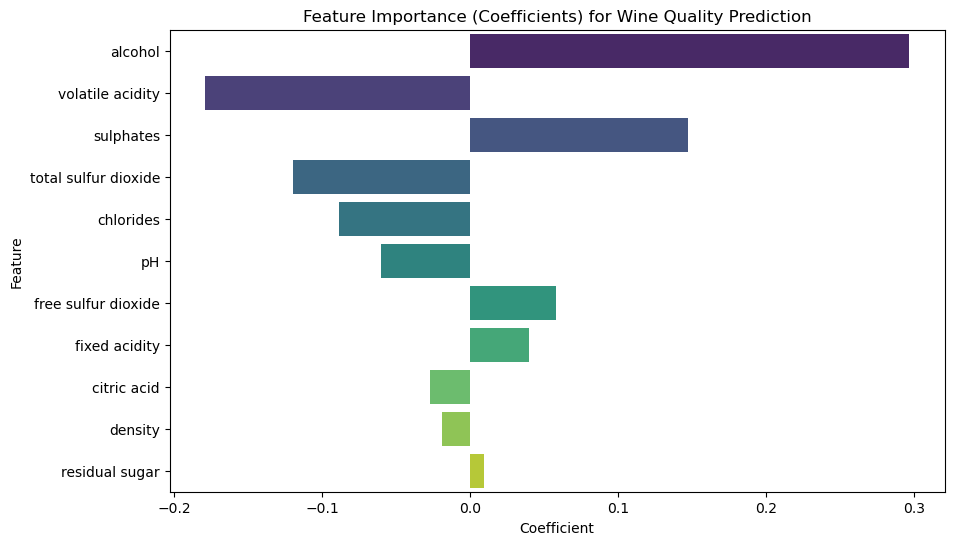

In [6]:
import seaborn as sns

# ... (Previous code remains the same)

# Plot feature importance using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Coefficient')
plt.title('Feature Importance (Coefficients) for Wine Quality Prediction')
plt.show()
